Data completion: 1.0
Information gain: 0.12
             OverallCond  SalePrice
OverallCond     1.000000  -0.077856
SalePrice      -0.077856   1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   o

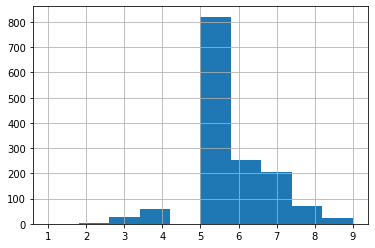

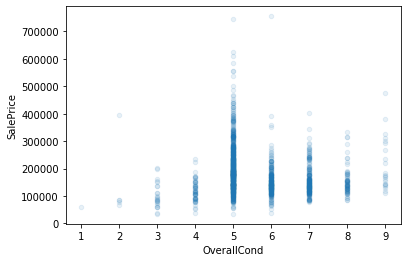

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from custom_functions import get_resume, information_gain
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data.info()

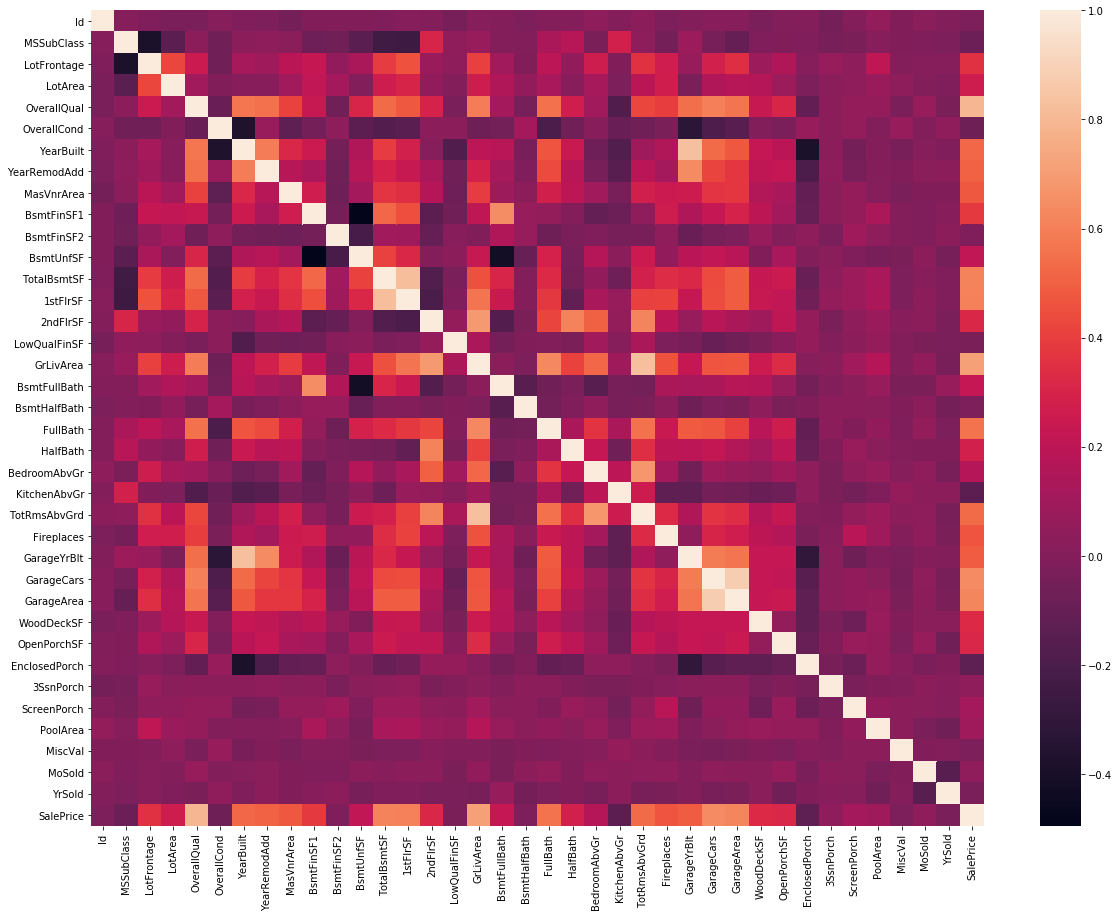

In [2]:
num_features_exploration = []
cat_features_exploration = []
for x in data.columns:
    if pd.api.types.is_object_dtype(data[x].dtype):
        cat_features_exploration.append(x)
    elif pd.api.types.is_numeric_dtype(data[x].dtype):
        num_features_exploration.append(x)
data[num_features_exploration].corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data[num_features_exploration].corr(),ax=ax)

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000141E08BF748>]],
      dtype=object)

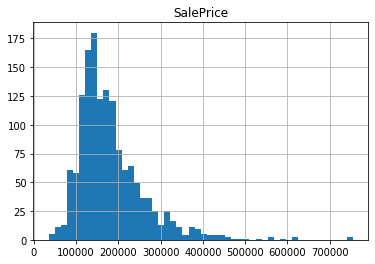

In [3]:
print(data[["SalePrice"]].describe())
data[["SalePrice"]].hist(bins=50)

In [4]:
# MSSubClass Analysis
feat = "MSSubClass"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 1.0
Data excepts: {150}
Information gain: 0.24


,count,mean,std,var,median,min,max
MSSubClass,,,,,,,
20,536,185224.811567,78782.189967,6.206633e+09,159250,35311,611657
30,69,95829.724638,24857.110083,6.178759e+08,99900,34900,163500
40,4,156125.000000,75747.799748,5.737729e+09,142500,79500,260000
45,12,108591.666667,20231.723889,4.093227e+08,107500,76000,139400
50,144,143302.972222,54851.983707,3.008740e+09,132000,37900,410000
60,299,239948.501672,86579.909966,7.496081e+09,215200,129000,755000
70,60,166772.416667,58206.545762,3.388002e+09,156000,40000,359100
75,16,192437.500000,100556.762577,1.011166e+10,163500,101000,475000
80,58,169736.551724,38197.808771,1.459073e+09,166500,107000,345000


In [5]:
data_test["MSSubClass"].value_counts()

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

En Test aparece la categoría MSSubClass 150, que no aparece en Train. Sería interesante hacer un K-neighbors o técnica similar para ver a qué categoría se parece más

In [6]:
# MSZoning
feat = "MSZoning"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)



Data completion: 1.0
Data test completion: 0.9972583961617546
Data excepts: {nan}
Information gain: 0.11


,count,mean,std,var,median,min,max
MSZoning,,,,,,,
C (all),10,74528.000000,33791.092031,1.141838e+09,74700,34900,133900
FV,65,214014.061538,52369.662067,2.742582e+09,205950,144152,370878
RH,16,131558.375000,35714.118435,1.275498e+09,136500,76000,200000
RL,1151,191004.994787,80766.341319,6.523202e+09,174000,39300,755000
RM,218,126316.830275,48521.689833,2.354354e+09,120500,37900,475000


Data completion: 0.8226027397260274
Data test completion: 0.8444139821795751


,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


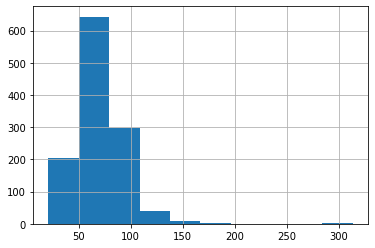

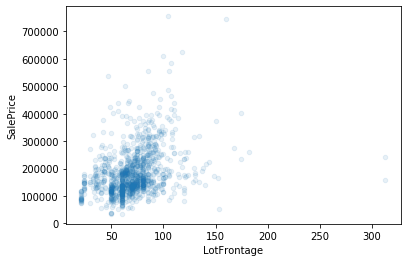

In [7]:
# LotFrontage
feat = "LotFrontage"
data[feat] = data[feat].fillna(data[feat].mode())
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
data[[feat,"SalePrice"]].corr()

Data completion: 1.0
Data test completion: 1.0
            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000


,LotAreaNorm,SalePrice
LotAreaNorm,1.000000,0.388528
SalePrice,0.388528,1.000000


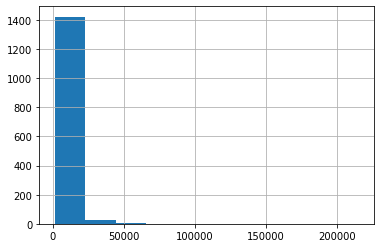

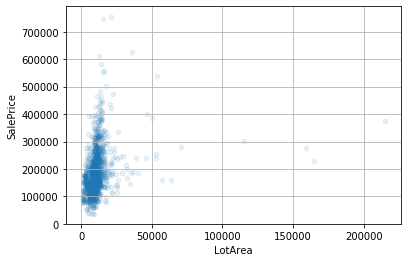

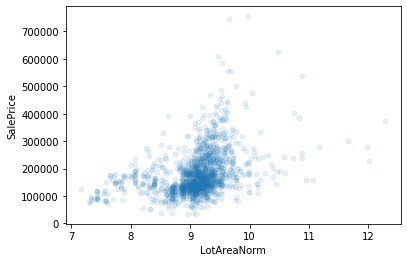

In [8]:
# LotArea
feat = "LotArea"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))

data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())

# Normalizamos
feat_norm = feat+"Norm"
data[feat_norm] = np.log(data.LotArea + 1)
data[feat_norm].hist()
data.plot(kind="scatter",x=feat_norm, y="SalePrice",alpha=0.1)
data[[feat_norm,"SalePrice"]].corr()

In [9]:
# Street
print("Information gain: {}".format(information_gain(data,"SalePrice","Street", norm=True)))
get_resume(data,"SalePrice","Street")

Information gain: 0.0


,count,mean,std,var,median,min,max
Street,,,,,,,
Grvl,6,130190.500000,65446.253991,4.283212e+09,114250,55993,228950
Pave,1454,181130.538514,79446.597317,6.311762e+09,163000,34900,755000


In [10]:
# Alley
feat = "Alley"
data[feat]=data[feat].fillna('Unk')
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Information gain: 0.02


,count,mean,std,var,median,min,max
Alley,,,,,,,
Grvl,50,122219.080000,34780.780734,1.209703e+09,119500,52500,256000
Pave,41,168000.585366,38370.375243,1.472286e+09,172500,40000,265979
Unk,1369,183452.131483,80667.145180,6.507188e+09,165000,34900,755000


In [11]:
# LotShape
feat = "LotShape"
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Information gain: 0.07


,count,mean,std,var,median,min,max
LotShape,,,,,,,
IR1,484,206101.665289,85858.489559,7.371680e+09,189000,52000,755000
IR2,41,239833.365854,99669.427362,9.933995e+09,221000,110000,538000
IR3,10,216036.500000,82540.334855,6.812907e+09,203570,73000,375000
Reg,925,164754.818378,69673.427215,4.854386e+09,146000,34900,582933


In [12]:
# LandContour
feat = "LandContour"
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Information gain: 0.02


,count,mean,std,var,median,min,max
LandContour,,,,,,,
Bnk,63,143104.079365,49361.244074,2.436532e+09,139400,52500,315000
HLS,50,231533.940000,101790.139741,1.036123e+10,222250,82500,538000
Low,36,203661.111111,83935.353620,7.045144e+09,190000,39300,385000
Lvl,1311,180183.746758,78463.567918,6.156531e+09,162900,34900,755000


In [13]:
# Utilities
feat = "Utilities"
print(data_test[feat].value_counts())
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

AllPub    1457
Name: Utilities, dtype: int64
Information gain: 0.0


,count,mean,std,var,median,min,max
Utilities,,,,,,,
AllPub,1459,180950.95682,79461.599814,6.314146e+09,163000,34900,755000
NoSeWa,1,137500.00000,NaN,NaN,137500,137500,137500


In [14]:
# LotConfig
feat = "LotConfig"
print(data_test[feat].value_counts())
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Information gain: 0.02


,count,mean,std,var,median,min,max
LotConfig,,,,,,,
Corner,263,181623.425856,84466.041222,7.134512e+09,160000.0,52500,755000
CulDSac,94,223854.617021,93117.546586,8.670877e+09,199262.0,84000,625000
FR2,47,177934.574468,62788.926829,3.942449e+09,165000.0,81000,394617
FR3,4,208475.000000,78379.222374,6.143302e+09,195450.0,128000,315000
Inside,1052,176938.047529,76426.805787,5.841057e+09,159697.5,34900,611657


In [15]:
# LandSlope
feat = "LandSlope"
print(data_test[feat].value_counts())
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
Information gain: 0.0


,count,mean,std,var,median,min,max
LandSlope,,,,,,,
Gtl,1382,179956.799566,78669.369151,6.188870e+09,161875,34900,755000
Mod,65,196734.138462,92375.358116,8.533207e+09,186700,39300,538000
Sev,13,204379.230769,86729.922409,7.522079e+09,185000,61000,375000


In [16]:
# Neighborhood
feat = "Neighborhood"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.54


,count,mean,std,var,median,min,max
Neighborhood,,,,,,,
Blmngtn,17,194870.882353,30393.229219,9.237484e+08,191000,159895,264561
Blueste,2,137500.000000,19091.883092,3.645000e+08,137500,124000,151000
BrDale,16,104493.750000,14330.176493,2.053540e+08,106000,83000,125000
BrkSide,58,124834.051724,40348.689270,1.628017e+09,124300,39300,223500
ClearCr,28,212565.428571,50231.538993,2.523208e+09,200250,130000,328000
CollgCr,150,197965.773333,51403.666438,2.642337e+09,197200,110000,424870
Crawfor,51,210624.725490,68866.395472,4.742580e+09,200624,90350,392500
Edwards,100,128219.700000,43208.616459,1.866985e+09,121750,58500,320000
Gilbert,79,192854.506329,35986.779085,1.295048e+09,181000,141000,377500


In [17]:
# Condition1
feat = "Condition1"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.03


,count,mean,std,var,median,min,max
Condition1,,,,,,,
Artery,48,135091.666667,66226.660548,4.385971e+09,119550,66500,475000
Feedr,81,142475.481481,42157.290117,1.777237e+09,140000,40000,244600
Norm,1260,184495.492063,81256.980125,6.602697e+09,166500,34900,755000
PosA,8,225875.000000,52348.932313,2.740411e+09,212500,180000,335000
PosN,19,215184.210526,65256.536609,4.258416e+09,200000,109500,385000
RRAe,11,138400.000000,24030.813553,5.774800e+08,142500,87000,171000
RRAn,26,184396.615385,66177.922070,4.379517e+09,171495,79500,423000
RRNe,2,190750.000000,5303.300859,2.812500e+07,190750,187000,194500
RRNn,5,212400.000000,93823.238060,8.802800e+09,214000,110000,320000


In [18]:
# Condition2
feat = "Condition2"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: {'RRAn', 'RRNn', 'RRAe'}
Information gain: 0.01


,count,mean,std,var,median,min,max
Condition2,,,,,,,
Artery,2,106500.000000,16263.455967,2.645000e+08,106500,95000,118000
Feedr,6,121166.666667,33544.994659,1.125267e+09,127500,79500,167500
Norm,1445,181169.405536,79337.735547,6.294476e+09,163500,34900,755000
PosA,1,325000.000000,NaN,NaN,325000,325000,325000
PosN,2,284875.000000,141598.132933,2.005003e+10,284875,184750,385000
RRAe,1,190000.000000,NaN,NaN,190000,190000,190000
RRAn,1,136905.000000,NaN,NaN,136905,136905,136905
RRNn,2,96750.000000,39951.533137,1.596125e+09,96750,68500,125000


In [19]:
# BldgType
feat = "BldgType"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.03


,count,mean,std,var,median,min,max
BldgType,,,,,,,
1Fam,1220,185763.807377,82648.502922,6.830775e+09,167900,34900,755000
2fmCon,31,128432.258065,35458.545158,1.257308e+09,127500,55000,228950
Duplex,52,133541.076923,27833.249197,7.746898e+08,135980,82000,206300
Twnhs,43,135911.627907,41013.222080,1.682084e+09,137500,75000,230000
TwnhsE,114,181959.342105,60626.108918,3.675525e+09,172200,75500,392500


In [20]:
# HouseStyle
feat = "HouseStyle"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: {'2.5Fin'}
Information gain: 0.08


,count,mean,std,var,median,min,max
HouseStyle,,,,,,,
1.5Fin,154,143116.740260,54277.941119,2.946095e+09,132000,37900,410000
1.5Unf,14,110150.000000,19036.473090,3.623873e+08,111250,76000,139400
1Story,726,175985.477961,77055.715011,5.937583e+09,154750,34900,611657
2.5Fin,8,220000.000000,118211.976671,1.397407e+10,194000,104000,475000
2.5Unf,11,157354.545455,63934.128032,4.087573e+09,133900,101000,325000
2Story,445,210051.764045,87339.213570,7.628138e+09,190000,40000,755000
SFoyer,37,135074.486486,30480.898192,9.290852e+08,135960,75500,206300
SLvl,65,166703.384615,38305.161339,1.467285e+09,164500,91000,345000


Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.68
             OverallQual  SalePrice
OverallQual     1.000000   0.790982
SalePrice       0.790982   1.000000


,count,mean,std,var,median,min,max
OverallQual,,,,,,,
1,2,50150.000000,15344.217152,2.354450e+08,50150,39300,61000
2,3,51770.333333,14254.200796,2.031822e+08,60000,35311,60000
3,20,87473.750000,24688.567399,6.095254e+08,86250,37900,139600
4,116,108420.655172,29022.003886,8.422767e+08,108000,34900,256000
5,397,133523.347607,27107.330927,7.348074e+08,133000,55993,228950
6,374,161603.034759,36090.182933,1.302501e+09,160000,76000,277000
7,319,207716.423197,44466.259414,1.977248e+09,200141,82500,383970
8,168,274735.535714,63898.902253,4.083070e+09,269750,122000,538000
9,43,367513.023256,81278.174849,6.606142e+09,345000,239000,611657


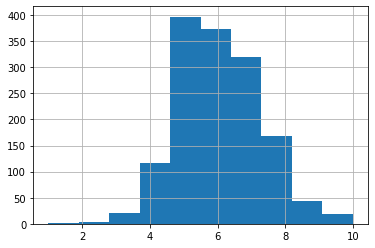

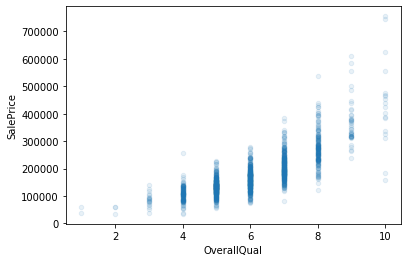

In [21]:
# OverallQual
feat = "OverallQual"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.12
             OverallCond  SalePrice
OverallCond     1.000000  -0.077856
SalePrice      -0.077856   1.000000


,count,mean,std,var,median,min,max
OverallCond,,,,,,,
1,1,61000.000000,NaN,NaN,61000,61000,61000
2,5,141986.400000,141342.813488,1.997779e+10,85000,67000,394432
3,25,101929.400000,44852.490403,2.011746e+09,89500,35311,200624
4,57,120438.438596,38922.525907,1.514963e+09,115000,40000,235000
5,821,203146.914738,85117.319416,7.244958e+09,185000,34900,745000
6,252,153961.591270,60737.969824,3.689101e+09,142750,37900,755000
7,205,158145.487805,53468.189431,2.858847e+09,145000,79900,402000
8,72,155651.736111,52375.144681,2.743156e+09,142500,84500,335000
9,22,216004.545455,96485.974689,9.309543e+09,176200,110500,475000


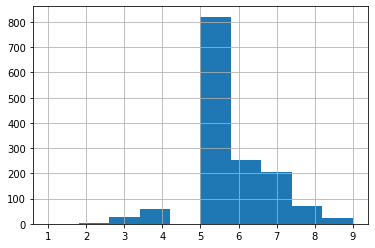

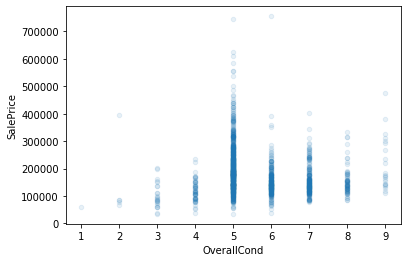

In [22]:
# OverallCond
feat = "OverallCond"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: {1872, 1875, 1879, 1882, 1885, 1892, 1893, 1895, 1896, 1898, 1901, 1902, 1904, 1906, 1907, 1908, 1911, 1913}
Information gain: 0.4
           YearBuilt  SalePrice
YearBuilt   1.000000   0.522897
SalePrice   0.522897   1.000000


,count,mean,std,var,median,min,max
YearBuilt,,,,,,,
1872,1,122000.000000,NaN,NaN,122000.0,122000,122000
1875,1,94000.000000,NaN,NaN,94000.0,94000,94000
1880,4,200619.750000,93021.399116,8.652981e+09,194989.5,117500,295000
1882,1,168000.000000,NaN,NaN,168000.0,168000,168000
1885,2,111250.000000,15909.902577,2.531250e+08,111250.0,100000,122500
1890,2,142200.000000,24465.894629,5.985800e+08,142200.0,124900,159500
1892,2,291250.000000,259861.742086,6.752812e+10,291250.0,107500,475000
1893,1,325000.000000,NaN,NaN,325000.0,325000,325000
1898,1,106000.000000,NaN,NaN,106000.0,106000,106000


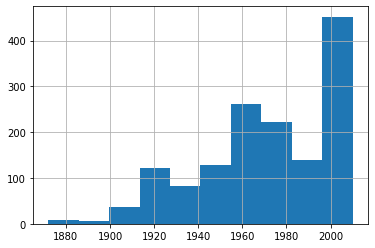

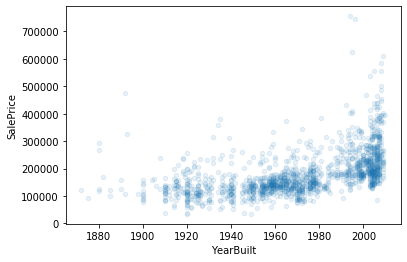

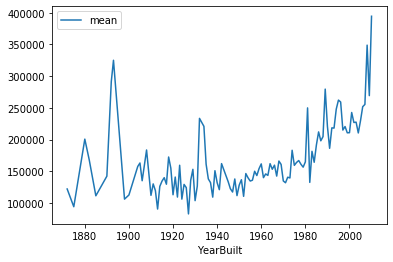

In [31]:
# YearBuilt
feat = "YearBuilt"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())
resume = get_resume(data,"SalePrice",feat)
resume.plot(kind="line",use_index=True,y="mean")
resume

Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.29
              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.507101
SalePrice         0.507101   1.000000


,count,mean,std,var,median,min,max
YearRemodAdd,,,,,,,
1950,178,117463.056180,39306.143137,1.544973e+09,115000.0,34900,256000
1951,4,129975.000000,18694.094433,3.494692e+08,138450.0,102000,141000
1952,5,110398.600000,42510.180073,1.807115e+09,123500.0,55993,166000
1953,10,147640.000000,48205.075805,2.323729e+09,152250.0,79900,225000
1954,14,121142.857143,19492.038386,3.799396e+08,118500.0,93000,165000
1955,9,124511.111111,18922.568830,3.580636e+08,130000.0,82000,145000
1956,10,124235.000000,14800.188625,2.190456e+08,128950.0,97000,139000
1957,9,132656.444444,26324.094928,6.929580e+08,141000.0,84000,166000
1958,15,128386.666667,30081.291449,9.048841e+08,136000.0,60000,172500


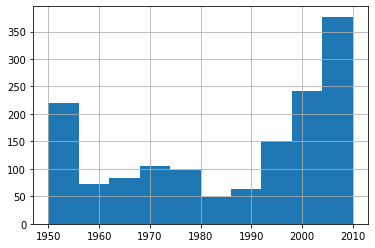

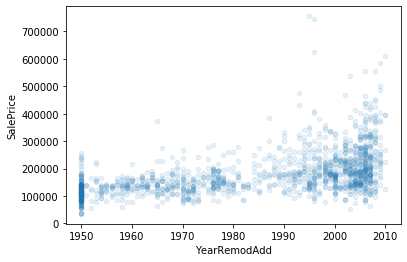

In [32]:
# YearRemodAdd
feat = "YearRemodAdd"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.05
           SalePrice
SalePrice        1.0


,count,mean,std,var,median,min,max
RoofStyle,,,,,,,
Flat,13,194690.000000,62522.963515,3.909121e+09,185000,82000,274970
Gable,1141,171483.956179,66331.237296,4.399833e+09,160000,34900,755000
Gambrel,11,148909.090909,67013.527807,4.490813e+09,139000,40000,259500
Hip,286,218876.933566,111549.603563,1.244331e+10,176500,55000,745000
Mansard,7,180568.428571,58057.624627,3.370688e+09,175000,100000,265979
Shed,2,225000.000000,49497.474683,2.450000e+09,225000,190000,260000


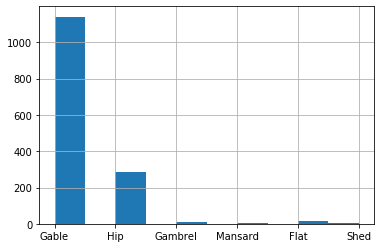

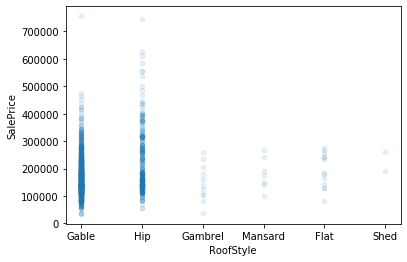

In [33]:
# RoofStyle
feat = "RoofStyle"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())
get_resume(data,"SalePrice",feat)

In [35]:
# RoofMatl
feat = "RoofMatl"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 1.0
Data excepts: {'Metal', 'Roll', 'ClyTile', 'Membran'}
Information gain: 0.03


,count,mean,std,var,median,min,max
RoofMatl,,,,,,,
ClyTile,1,160000.000000,NaN,NaN,160000,160000,160000
CompShg,1434,179803.679219,77722.388636,6.040770e+09,162000,34900,745000
Membran,1,241500.000000,NaN,NaN,241500,241500,241500
Metal,1,180000.000000,NaN,NaN,180000,180000,180000
Roll,1,137000.000000,NaN,NaN,137000,137000,137000
Tar&Grv,11,185406.363636,65430.141720,4.281103e+09,167000,82000,274970
WdShake,5,241400.000000,36218.779659,1.311800e+09,242000,190000,287000
WdShngl,6,390250.000000,206969.019421,4.283618e+10,332500,168500,755000


In [36]:
# Exterior1st
feat = "Exterior1st"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 0.9993145990404386
Data excepts: {nan, 'ImStucc', 'Stone'}
Information gain: 0.15


,count,mean,std,var,median,min,max
Exterior1st,,,,,,,
AsbShng,20,107385.550000,33756.480660,1.139500e+09,108000.0,35311,165500
AsphShn,1,100000.000000,NaN,NaN,100000.0,100000,100000
BrkComm,2,71000.000000,15556.349186,2.420000e+08,71000.0,60000,82000
BrkFace,50,194573.000000,82841.914370,6.862783e+09,165750.0,40000,430000
CBlock,1,105000.000000,NaN,NaN,105000.0,105000,105000
CemntBd,61,231690.655738,120575.621318,1.453848e+10,236500.0,75000,556581
HdBoard,222,163077.450450,66305.714164,4.396448e+09,149900.0,83000,755000
ImStucc,1,262000.000000,NaN,NaN,262000.0,262000,262000
MetalSd,220,149422.177273,54776.408990,3.000455e+09,139000.0,62383,392000


In [38]:
# Exterior2nd
feat = "Exterior2nd"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Data test completion: 0.9993145990404386
Data excepts: {nan, 'Other'}
Information gain: 0.14


,count,mean,std,var,median,min,max
Exterior2nd,,,,,,,
AsbShng,20,114060.550000,42315.043608,1.790563e+09,111000.0,35311,225000
AsphShn,3,138000.000000,37509.998667,1.407000e+09,139000.0,100000,175000
Brk Cmn,7,126714.285714,38693.084161,1.497155e+09,147000.0,60000,155000
BrkFace,25,195818.000000,95097.551756,9.043544e+09,160000.0,40000,430000
CBlock,1,105000.000000,NaN,NaN,105000.0,105000,105000
CmentBd,60,230093.833333,116140.396221,1.348859e+10,238750.0,75000,556581
HdBoard,207,167661.565217,70061.078357,4.908555e+09,155000.0,83000,755000
ImStucc,10,252070.000000,193176.672447,3.731723e+10,187600.0,88000,745000
MetalSd,214,149803.172897,55078.595310,3.033652e+09,138750.0,62383,392000


In [43]:
feat = "ExtTotal"
data[feat] = data["Exterior1st"] + data["Exterior2nd"]
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Data completion: 1.0
Information gain: 0.19


,count,mean,std,var,median,min,max
ExtTotal,,,,,,,
AsbShngAsbShng,17,108924.176471,35501.347672,1.260346e+09,110000.0,35311,165500
AsbShngPlywood,2,104500.000000,31819.805153,1.012500e+09,104500.0,82000,127000
AsbShngStucco,1,87000.000000,NaN,NaN,87000.0,87000,87000
AsphShnAsphShn,1,100000.000000,NaN,NaN,100000.0,100000,100000
BrkCommBrk Cmn,2,71000.000000,15556.349186,2.420000e+08,71000.0,60000,82000
BrkFaceAsbShng,1,225000.000000,NaN,NaN,225000.0,225000,225000
BrkFaceBrkFace,24,198143.750000,96413.871581,9.295635e+09,162750.0,40000,430000
BrkFaceHdBoard,3,241500.000000,105578.170092,1.114675e+10,262500.0,127000,335000
BrkFacePlywood,6,191500.000000,46475.800154,2.160000e+09,202500.0,132500,237500


In [55]:
# MasVnrType
feat = "MasVnrType"
data[feat] = data[feat].fillna(data[feat].describe()['top'])
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 0.9890335846470185
Data excepts: {nan}
Information gain: 0.18


,count,mean,std,var,median,min,max
MasVnrType,,,,,,,
BrkCmn,15,146318.066667,46187.583632,2.133293e+09,139000,89471,277000
BrkFace,445,204691.871910,81214.293554,6.595761e+09,181000,75000,755000
None,872,156958.243119,61491.688969,3.781228e+09,143125,34900,745000
Stone,128,265583.625000,99940.156577,9.988035e+09,246839,119000,611657
